<a href="https://colab.research.google.com/github/binarymath/Studying_TensorFlow2/blob/main/TF2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-05-11 19:07:54--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-05-11 19:07:54 (35.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [5]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [6]:
# Load in the data

In [7]:
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [8]:
X = data[:,0].reshape(-1,1) # making an N X D
Y = data[:,1]

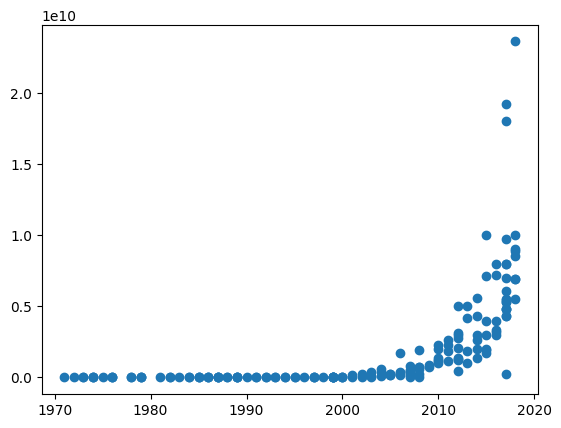

In [9]:
# Plot the data
plt.scatter(X,Y)

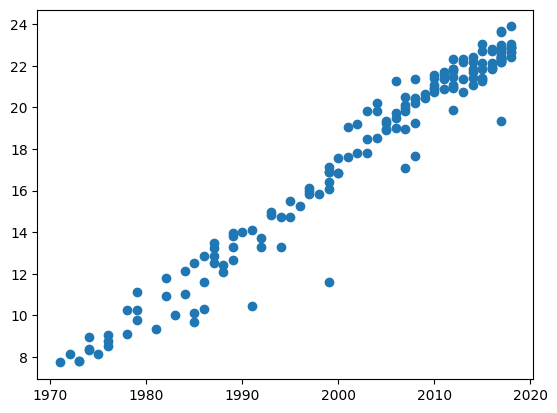

In [10]:
Y = np.log(Y)
plt.scatter(X,Y)

In [11]:
X = X - X.mean()

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1),
])

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9), 
    loss='mse',
)

In [17]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [18]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 7ms/step - loss: 319.1830 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 286.2798 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 362.0282 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 340.8372 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 170.6759 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 147.7573 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 101.6938 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 64.0902 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 52.1427 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 35.0868 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss: 

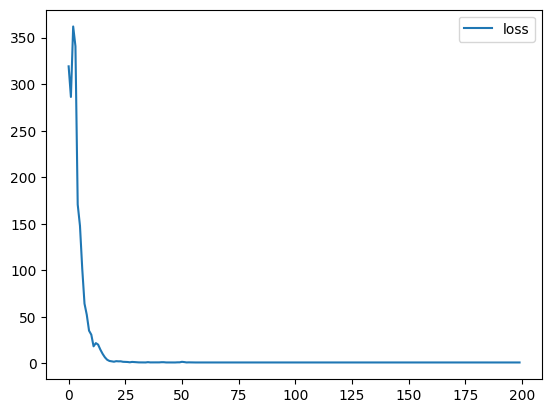

In [19]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [20]:
model.layers

In [21]:
model.layers[0].get_weights()

[array([[0.34076092]], dtype=float32), array([17.756655], dtype=float32)]

In [22]:
a = model.layers[0].get_weights()[0][0,0]

In [23]:
a

0.34076092

In [27]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum())/denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y))/denominator
print(a,b)

0.341682487387313 17.764939393631764
